In [52]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
meta_data = pd.read_csv('../Data/Chest_xray_Corona_Metadata.csv')

In [54]:
missing_vals = meta_data.isnull().sum()
print(missing_vals)

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64


In [55]:
train_data = meta_data[meta_data['Dataset_type'] == 'TRAIN']
test_data = meta_data[meta_data['Dataset_type'] == 'TEST']

In [56]:
train_data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


## Visualizing the data ratio

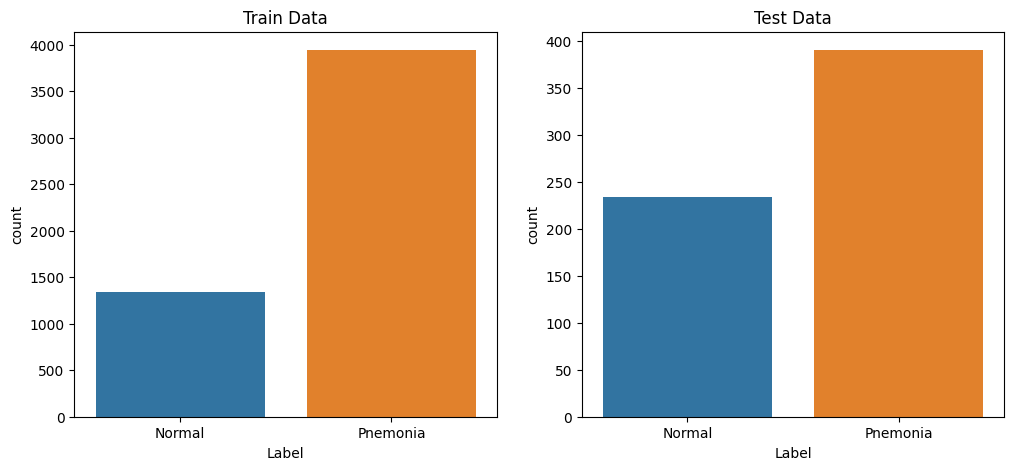

In [57]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.countplot(data=train_data, x='Label',ax=ax[0])
sns.countplot(data=test_data, x='Label',ax =ax[1])
ax[0].set_title('Train Data')
ax[1].set_title('Test Data')
plt.show()

## Exporting the data

In [58]:
train_data[['X_ray_image_name', 'Label']].to_csv("../Data/training_label.csv", index = False)

In [59]:
test_data[['X_ray_image_name', 'Label']].to_csv("../Data/testing_label.csv", index = False)